In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
from error_propagation import Complex
from astropy.io import fits
from matplotlib.colors import LogNorm
from matplotlib.patches import Ellipse
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.detection import DAOStarFinder
from photutils.psf import PSFPhotometry, IterativePSFPhotometry
from photutils.psf import make_psf_model_image, CircularGaussianPSF, GaussianPSF, MoffatPSF
from tqdm import tqdm
import emcee
norm = ImageNormalize(stretch=SqrtStretch())

In [2]:
image_file = '/Users/ainsleylewis/Downloads/Rommulus_withLight_Mock_i2_SNIa_z1_cusp.fits'

In [3]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /Users/ainsleylewis/Downloads/Rommulus_withLight_Mock_i2_SNIa_z1_cusp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   (1039, 1039, 6)   float64   


In [4]:
hdu_list[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                 1039                                                  
NAXIS2  =                 1039                                                  
NAXIS3  =                    6                                                  
EXTEND  =                    T                                                  
BUNIT   = 'electron/s'                                                          
TELESCOP= 'HST     '                                                            
INSTRUME= 'WFC3    '                                                            
FILTER  = 'SDSS-r (F625W)'                                                      
PHOTFLAM=              1.2E-19 / erg/cm**2/AA/electron                          
WL_PIVOT=               6266

In [5]:
cube_1 = hdu_list[0].data[0]
cube_2 = hdu_list[0].data[1]
cube_3 = hdu_list[0].data[2]
cube_4 = hdu_list[0].data[3]
cube_5 = hdu_list[0].data[4]
cube_6 = hdu_list[0].data[5]

hdu_list.close()


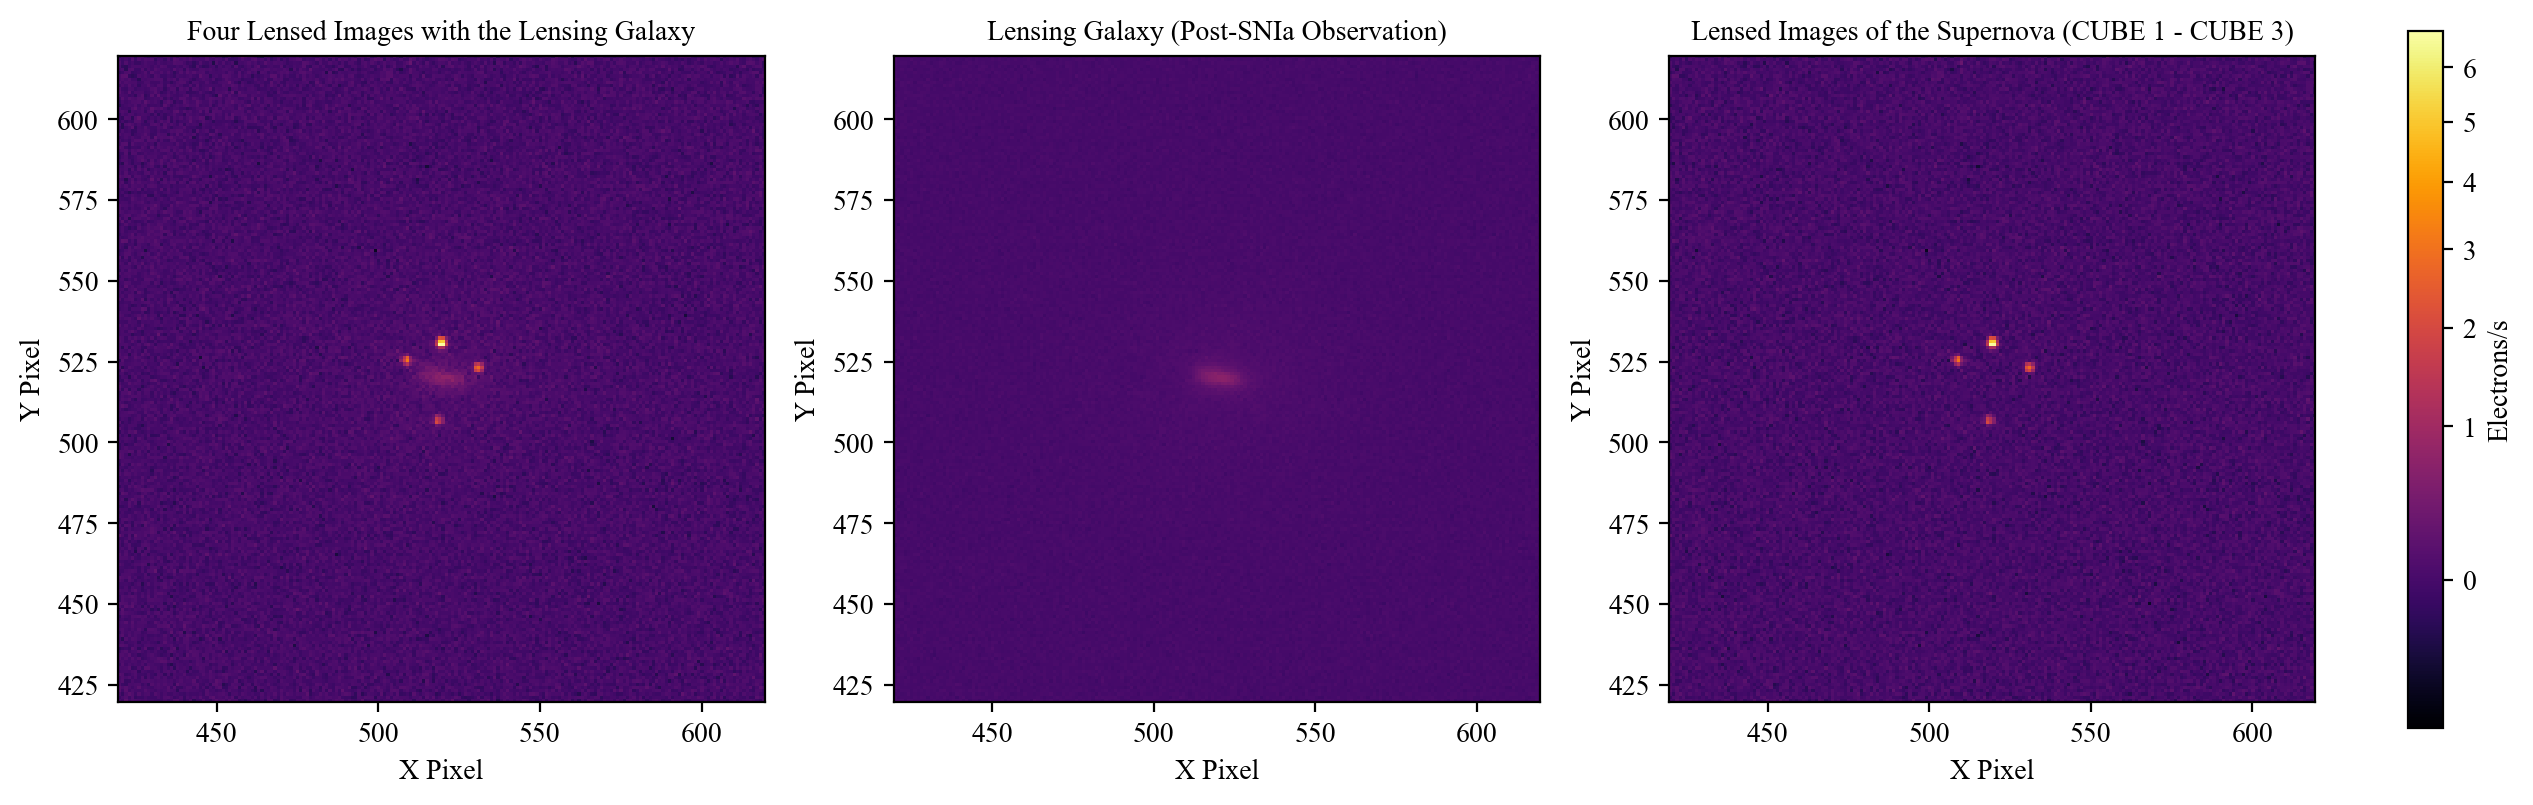

In [26]:
# Plotting the selected cubes with flipped y-axis and a common color bar

norm = ImageNormalize(stretch=SqrtStretch())

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

# Plot each cube
im1 = ax[0].imshow(cube_1, cmap='inferno', norm=norm)
ax[0].set_title('Four Lensed Images with the Lensing Galaxy', fontsize=10)
ax[0].set_xlabel('X Pixel')
ax[0].set_ylabel('Y Pixel')
ax[0].set_xlim(419.5, 619.5)
ax[0].set_ylim(419.5, 619.5)


im2 = ax[1].imshow(cube_3, cmap='inferno', norm=norm)
ax[1].set_title('Lensing Galaxy (Post-SNIa Observation)', fontsize=10)
ax[1].set_xlabel('X Pixel')
ax[1].set_ylabel('Y Pixel')
ax[1].set_xlim(419.5, 619.5)
ax[1].set_ylim(419.5, 619.5)

im3 = ax[2].imshow(cube_5, cmap='inferno', norm=norm)
ax[2].set_title('Lensed Images of the Supernova (CUBE 1 - CUBE 3)', fontsize=10)
ax[2].set_xlabel('X Pixel')
ax[2].set_ylabel('Y Pixel')
ax[2].set_xlim(419.5, 619.5)
ax[2].set_ylim(419.5, 619.5)

# Add a common color bar
cbar = fig.colorbar(im1, ax=ax, orientation='vertical', fraction=0.015, pad=0.04)
cbar.set_label('Electrons/s')

# plt.suptitle('Mock Observation of a Lensed Supernova', fontsize=12, y=0.70)

plt.show()


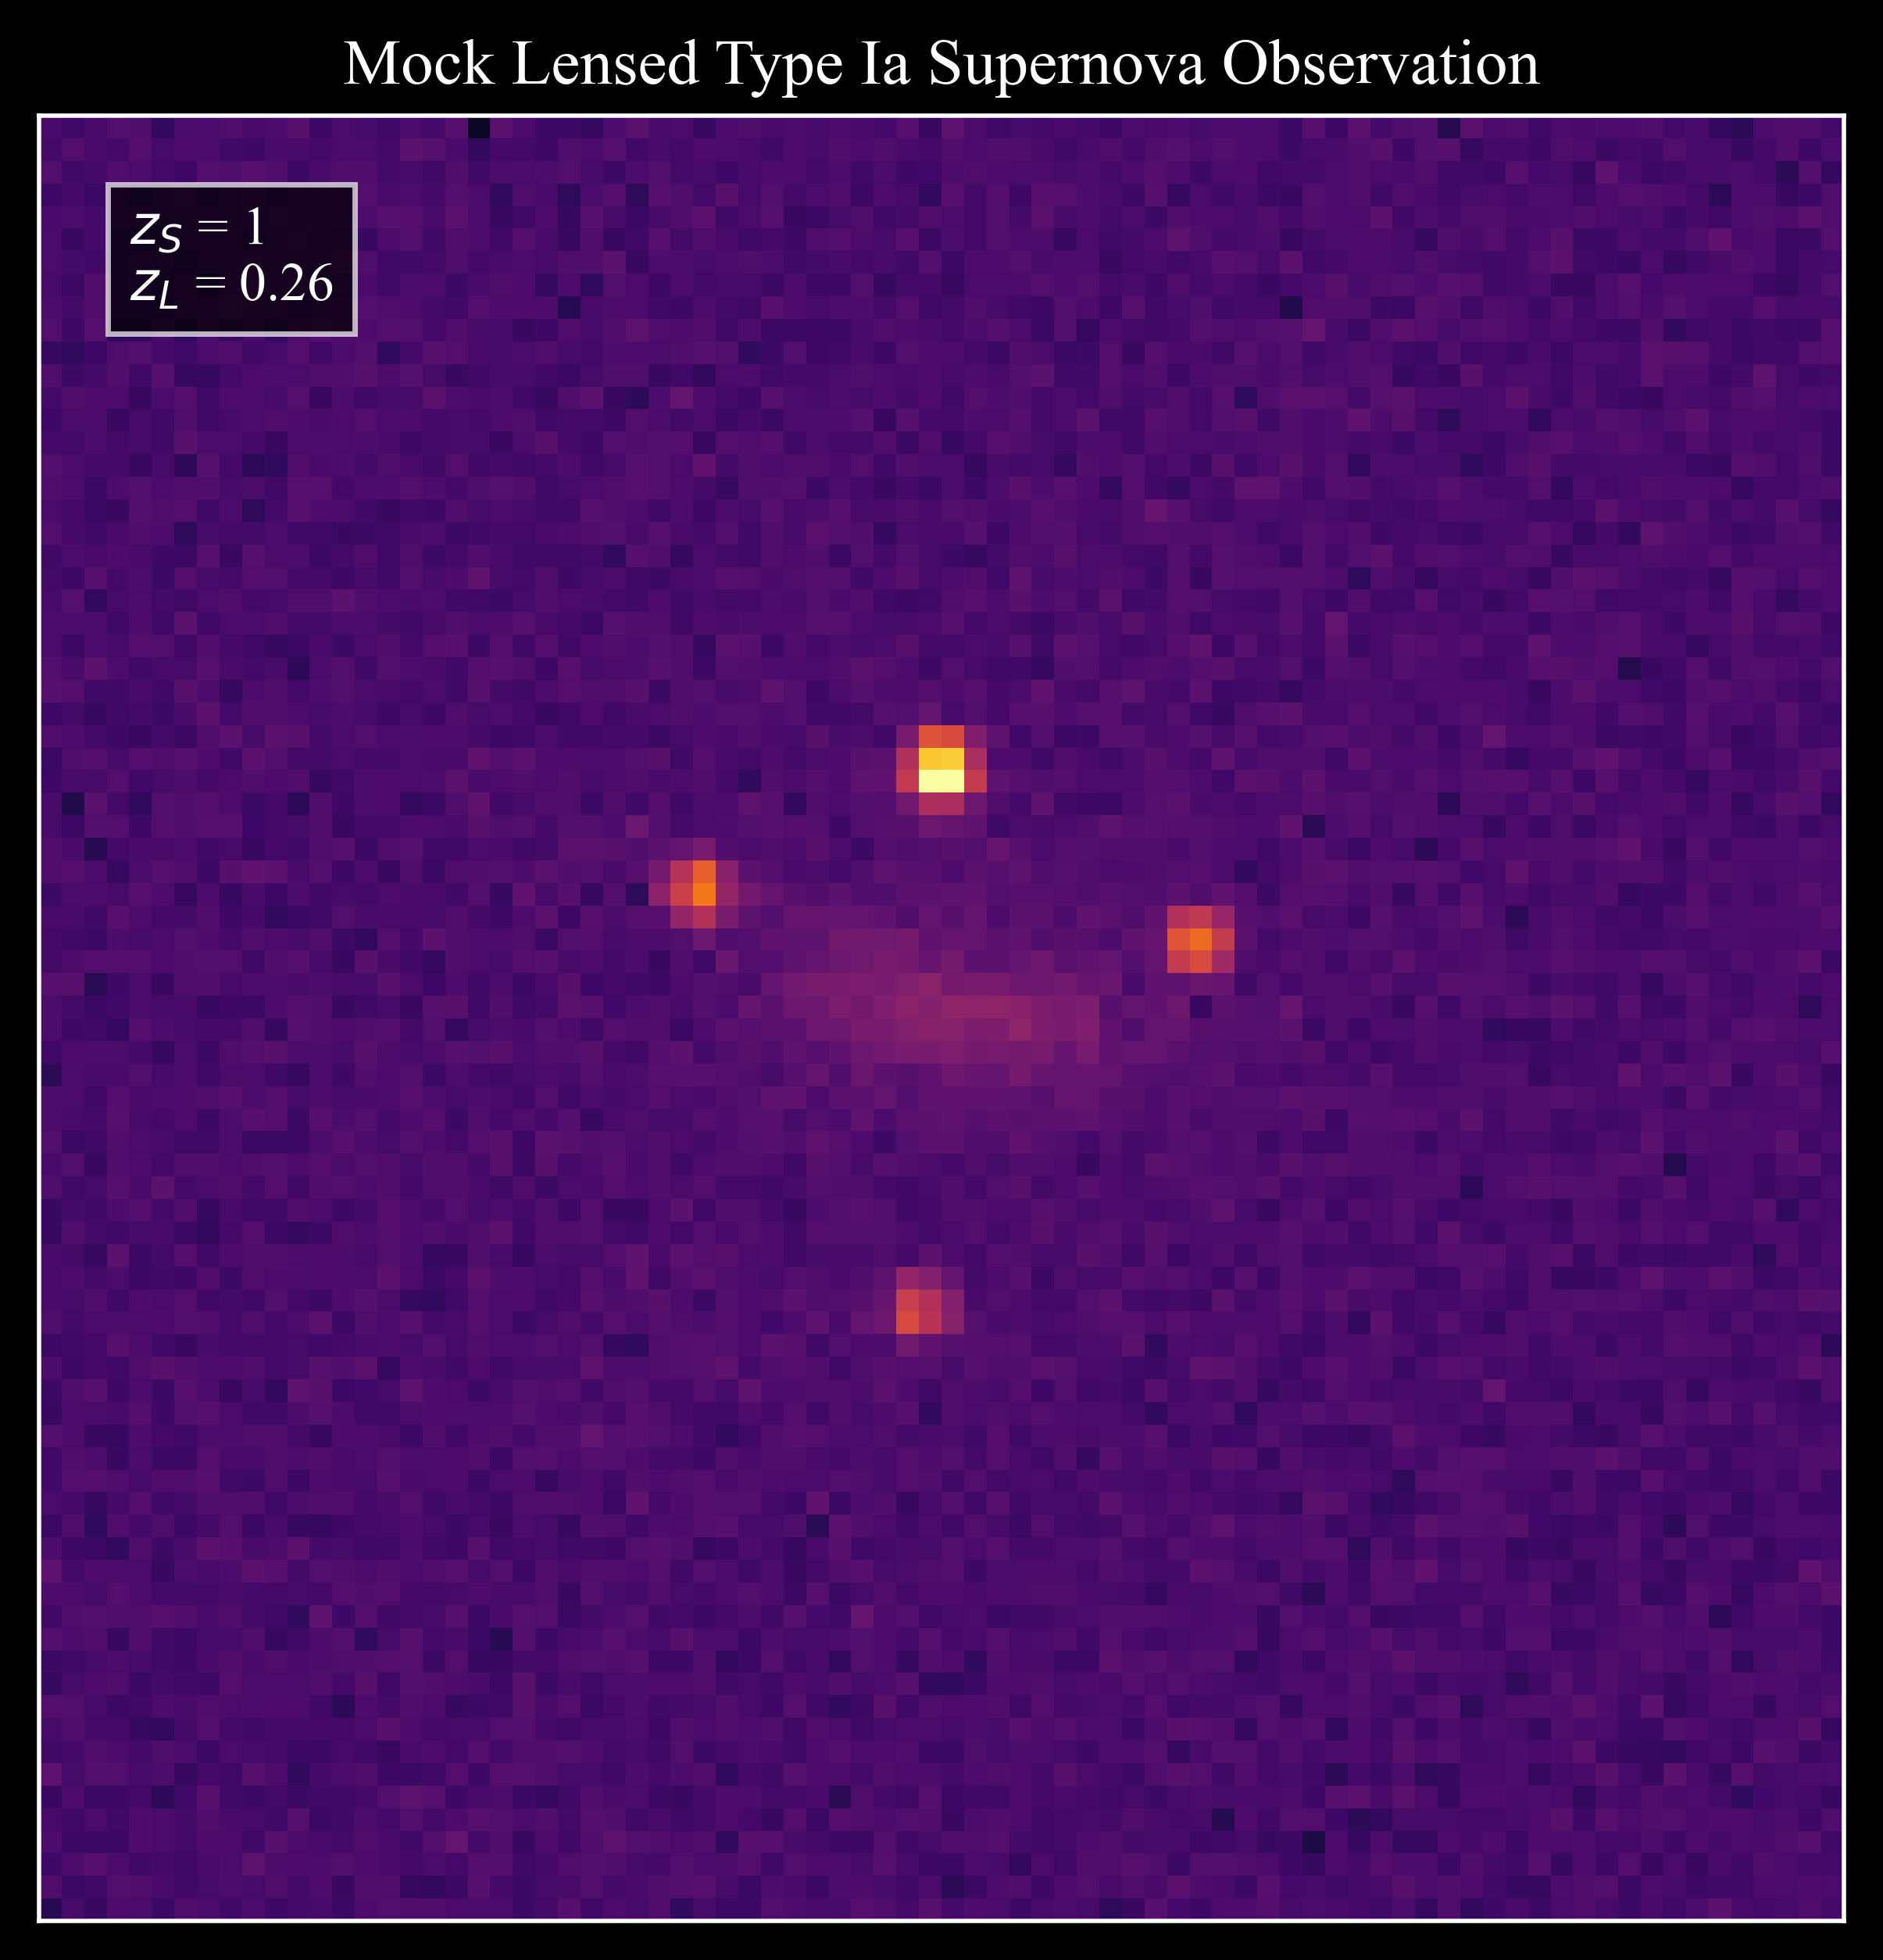

In [28]:
zoom = 60
plt.figure(figsize=(8, 6))
plt.imshow(cube_1, cmap='inferno', norm=norm, origin='lower')
plt.xlim(419.5 + zoom, 619.5 - zoom)
plt.ylim(419.5 + zoom, 619.5 - zoom)
plt.xticks([])
plt.yticks([])
plt.text(0.05, 0.95, '$z_{S}$ = 1\n$z_{L}$ = 0.26', transform=plt.gca().transAxes,
         fontsize=10, color='white', ha='left', va='top',
         bbox=dict(facecolor='k', alpha=0.7, edgecolor='w'))
plt.title('Mock Lensed Type Ia Supernova Observation')
plt.show()